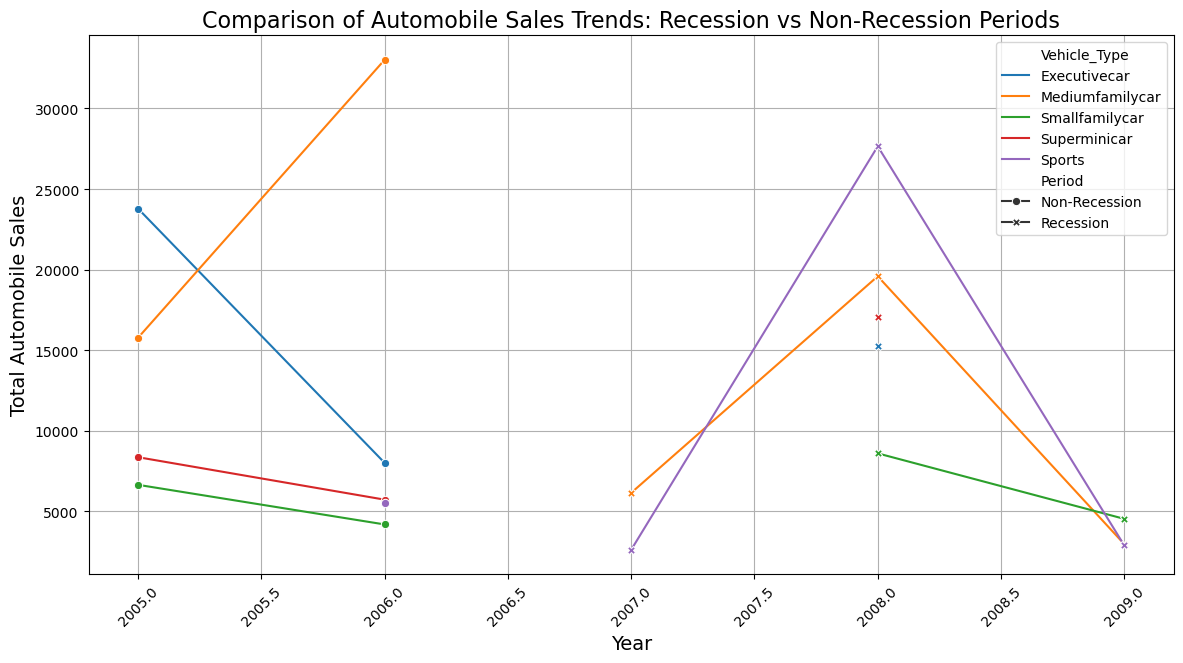

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (assuming it has been created and saved as 'automobile_sales_data.csv')
df = pd.read_csv('automobile_sales_data.csv')

# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the Date
df['Year'] = df['Date'].dt.year

# Define recession and non-recession periods
# For this example, we'll compare the recession period of 2007-2009 with a non-recession period of 2005-2006
recession_period = df[(df['Year'] >= 2007) & (df['Year'] <= 2009)]
non_recession_period = df[(df['Year'] >= 2005) & (df['Year'] <= 2006)]

# Combine the two periods for comparison
comparison_df = pd.concat([recession_period.assign(Period='Recession'),
                            non_recession_period.assign(Period='Non-Recession')])

# Group by Year and Vehicle_Type, summing the Automobile_Sales
sales_trend = comparison_df.groupby(['Year', 'Vehicle_Type', 'Period'])['Automobile_Sales'].sum().reset_index()

# Create a Seaborn line plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_trend, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Period', markers=True, dashes=False)

plt.title('Comparison of Automobile Sales Trends: Recession vs Non-Recession Periods', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Automobile Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid()

# Save the plot as an image
plt.savefig('Seaborn_Sales_Trend_Comparison.png')

# Show the plot
plt.show()
